# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [7]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [50]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape

(81937, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog license. `Guard or Trained` is whether the dog is a guard dog or a trained dog. `Spayed or Neut`is whether the dog is spayed.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. How many percent of dogs are spayed and vaccinated
2. How many dogs have Animal Third Color
3. Max period of time between liscense application data and issued date?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

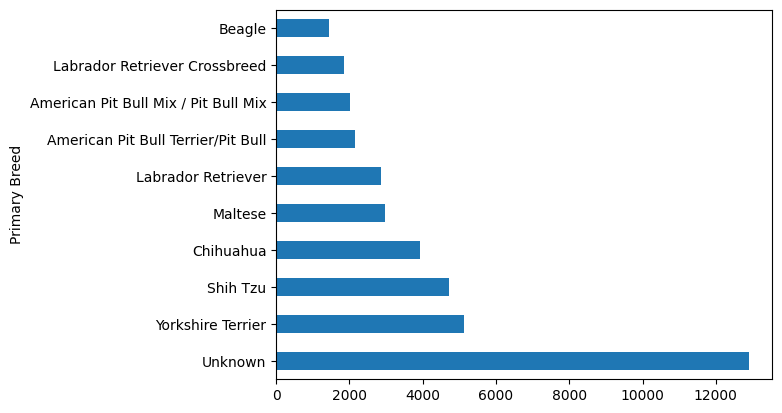

In [32]:
df['Primary Breed'].value_counts(ascending=False).head(10).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: xlabel='Primary Breed'>

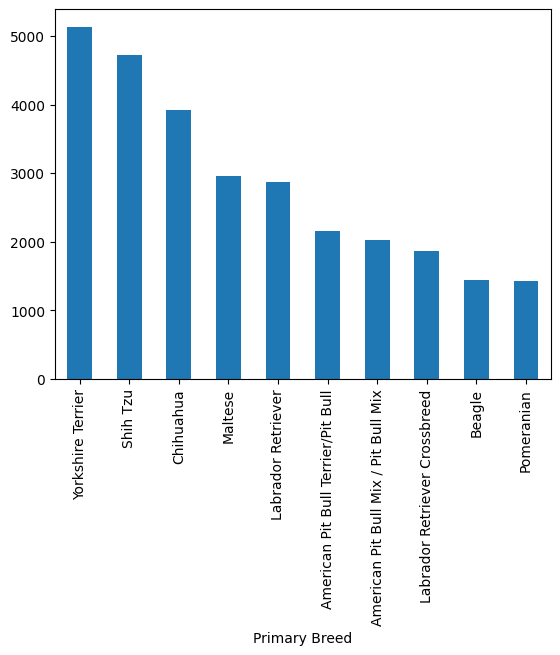

In [33]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts(ascending=False).head(10).plot(kind='bar')

## What are the most popular dog names?

In [39]:
df['Animal Name'].value_counts(ascending=False).head()

Animal Name
UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [42]:
df['Animal Name'].str.contains("Sabina").value_counts()

Animal Name
False    81727
Name: count, dtype: int64

In [43]:
df['Animal Name'].str.contains("Max").value_counts()

Animal Name
False    80800
True       927
Name: count, dtype: int64

In [44]:
df['Animal Name'].str.contains("Maxwell").value_counts()

Animal Name
False    81676
True        51
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [45]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.998971
Yes    0.001029
Name: proportion, dtype: float64

## What are the actual numbers?

In [46]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     49525
Yes       51
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [47]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     49525
NaN    32361
Yes       51
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [54]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')

In [56]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     81886
Yes       51
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [59]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts().head()

Primary Breed
Unknown                11
German Shepherd Dog     4
Chihuahua               3
Labrador Retriever      3
Rottweiler              3
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [61]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [63]:
df['Age'] = 2023 - df['Year']

In [64]:
df.Age.mean()

13.341848005174707

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [66]:
nbh = pd.read_csv('zipcodes-neighborhoods.csv')

In [67]:
nbh

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [70]:
df['Owner Zip Code'].isna().value_counts()

Owner Zip Code
False    81937
Name: count, dtype: int64

In [72]:
merged = nbh.merge(df, left_on='zip', right_on='Owner Zip Code')
merged.head(10)

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,White,Tan,Apricot,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,13
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,2008,15
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,Brown,Tan,Cream,2005-02-01,Yes,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2005,18
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,Black,Gray,Tan,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,12
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,19
5,Central Bronx,10453,Bronx,10453,Amber,F,"Poodle, Miniature",NaN,WHITE,NaN,NaN,2007-02-01,Yes,No,Yes,2015-04-17 15:35:48.417,2015-04-17,2016-05-12,2007,16
6,Central Bronx,10453,Bronx,10453,Blackie,F,"Poodle, Standard",NaN,Black,NaN,NaN,2003-01-01,No,No,Yes,2015-04-29 09:04:13.047,2015-04-29,2016-05-30,2003,20
7,Central Bronx,10453,Bronx,10453,Jewels,F,Yorkshire Terrier,NaN,BROWN,TAN,NaN,2003-07-01,No,No,Yes,2015-04-29 12:50:14.797,2015-04-29,2016-05-14,2003,20
8,Central Bronx,10453,Bronx,10453,Casper,M,Chihuahua,NaN,BLOND,NaN,NaN,2004-01-01,No,No,Yes,2015-05-01 09:48:13.173,2015-05-01,2016-04-29,2004,19
9,Central Bronx,10453,Bronx,10453,Sol,F,German Shepherd Dog,NaN,Brown,Black,NaN,2015-02-01,No,No,No,2015-05-01 23:05:05.127,2015-05-01,2016-05-01,2015,8


In [75]:
merged[merged.borough == 'Bronx']['Animal Name'].value_counts().head()

Animal Name
Rocky       60
Max         56
Bella       54
Lucky       51
Princess    43
Name: count, dtype: int64

In [76]:
merged[merged.borough == 'Brooklyn']['Animal Name'].value_counts().head()

Animal Name
unknown    234
Unknown    161
UNKNOWN    155
Max        113
Bella      112
Name: count, dtype: int64

In [77]:
merged[merged.neighborhood == 'Upper East Side']['Animal Name'].value_counts().head()

Animal Name
Lucy       40
Bella      31
Charlie    29
Coco       29
NO NAME    26
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [80]:
merged.groupby('neighborhood')['Primary Breed'].value_counts()

neighborhood  Primary Breed     
Borough Park  Unknown               287
              Yorkshire Terrier     115
              Shih Tzu              100
              Chihuahua              86
              Maltese                83
                                   ... 
West Queens   Smooth Fox Terrier      1
              Bulldog                 1
              Brittany Spaniel        1
              Border Terrier          1
              Saluki                  1
Name: count, Length: 5639, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [88]:
df[df['Spayed or Neut'] == 'No']['Primary Breed'].value_counts(ascending=True).head(35)

Primary Breed
Kerry Blue Terrier            1
Thai Ridgeback                1
Great Pyrenees                1
Mudi                          1
Saluki                        1
Pharaoh Hound                 1
Gordon Setter                 1
Karelian Bear Dog             1
Portuguese Podengo Pequeno    1
Lakeland Terrier              1
American Hairless Terrier     1
Cesky Terrier                 1
Lowchen                       1
Entlebucher Mountain Dog      1
Glen of Imaal Terrier         1
Jindo                         1
Bouvier Des Flandres          1
German Longhaired Pointer     1
Australian Kelpie             1
Ibizan Hound                  1
Anatolian Shepherd Dog        1
Field Spaniel                 1
Redbone Coonhound             1
Irish Red and White Setter    1
Russian Toy                   1
American Water Spaniel        1
Berger Picard                 1
English Foxhound              1
Manchester Terrier            1
Siberian Husky Crossbreed     1
Welsh Springer Spaniel    

In [89]:
df[df['Spayed or Neut'] == 'No']['Animal Gender'].value_counts()

Animal Gender
M    9914
F    5808
Name: count, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [92]:
import re

In [104]:
mono_merged = merged[['Animal Dominant Color','Animal Secondary Color', 'Animal Third Color']]
mono_merged.str.contains('black|white|grey', flags=re.IGNORECASE).head()



AttributeError: 'DataFrame' object has no attribute 'str'

## How many dogs are in each borough? Plot it in a graph.

<Axes: xlabel='borough'>

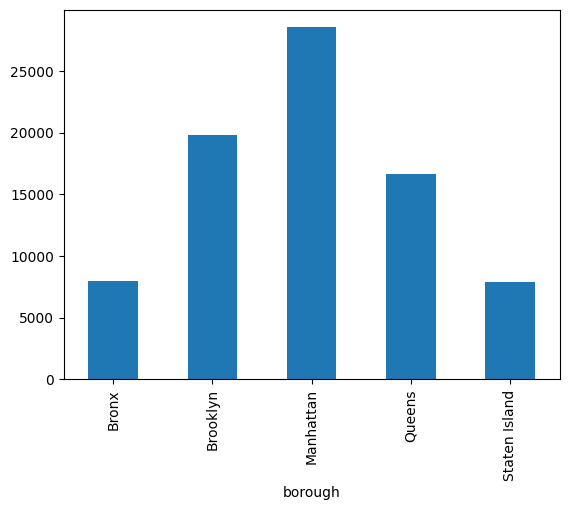

In [111]:
merged.groupby('borough').size().plot(kind='bar')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [114]:
pop = pd.read_csv('boro_population.csv')

In [115]:
pop.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [116]:
new_merged = pop.merge(merged, left_on='borough', right_on='borough')

In [117]:
new_merged.head()

,borough,population,area_sqmi,neighborhood,zip,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,...,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,Manhattan,1644518,23,Central Harlem,10026,10026,OREO MARIN,F,Havanese,NaN,...,NaN,2005-09-01,Yes,No,Yes,2014-09-24 11:00:58.667,2014-09-24,2017-05-21,2005,18
1,Manhattan,1644518,23,Central Harlem,10026,10026,Jake Isbell,M,Puggle,NaN,...,NaN,2013-10-01,Yes,No,Yes,2014-10-01 22:16:25.653,2014-10-01,2017-10-01,2013,10
2,Manhattan,1644518,23,Central Harlem,10026,10026,OLIVIA,F,Havanese,NaN,...,BLACK,2008-03-01,Yes,No,Yes,2014-10-11 15:08:12.983,2014-10-11,2017-08-19,2008,15
3,Manhattan,1644518,23,Central Harlem,10026,10026,Henry,M,Unknown,Hound Mix,...,Brown,2007-07-01,Yes,No,Yes,2014-11-01 13:52:57.347,2014-11-01,2016-11-01,2007,16
4,Manhattan,1644518,23,Central Harlem,10026,10026,Milo,M,Yorkshire Terrier,NaN,...,Brown,2011-06-01,Yes,No,Yes,2014-11-04 21:11:14.157,2014-11-04,2016-11-04,2011,12


In [117]:
new_merged.head()

,borough,population,area_sqmi,neighborhood,zip,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,...,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,Manhattan,1644518,23,Central Harlem,10026,10026,OREO MARIN,F,Havanese,NaN,...,NaN,2005-09-01,Yes,No,Yes,2014-09-24 11:00:58.667,2014-09-24,2017-05-21,2005,18
1,Manhattan,1644518,23,Central Harlem,10026,10026,Jake Isbell,M,Puggle,NaN,...,NaN,2013-10-01,Yes,No,Yes,2014-10-01 22:16:25.653,2014-10-01,2017-10-01,2013,10
2,Manhattan,1644518,23,Central Harlem,10026,10026,OLIVIA,F,Havanese,NaN,...,BLACK,2008-03-01,Yes,No,Yes,2014-10-11 15:08:12.983,2014-10-11,2017-08-19,2008,15
3,Manhattan,1644518,23,Central Harlem,10026,10026,Henry,M,Unknown,Hound Mix,...,Brown,2007-07-01,Yes,No,Yes,2014-11-01 13:52:57.347,2014-11-01,2016-11-01,2007,16
4,Manhattan,1644518,23,Central Harlem,10026,10026,Milo,M,Yorkshire Terrier,NaN,...,Brown,2011-06-01,Yes,No,Yes,2014-11-04 21:11:14.157,2014-11-04,2016-11-04,2011,12


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

## What percentage of dogs are not guard dogs?

In [105]:
df['Guard or Trained'].value_counts(normalize=True, dropna=False)

Guard or Trained
No     0.999378
Yes    0.000622
Name: proportion, dtype: float64